In [1]:
import numpy as np
from halo_mass_function import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from astropy.cosmology import LambdaCDM
from matplotlib import ticker
from matplotlib.ticker import FixedLocator, FixedFormatter

In [2]:
params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
plt.rcParams["figure.dpi"]= 150
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(params)

# halo mass function plots

### Difference between open universe and standard $\Lambda$CDM universe

Text(0, 0.5, 'dn/dlogM')

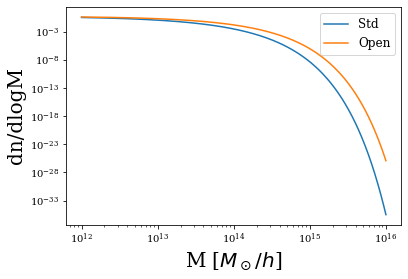

In [5]:
from colossus.cosmology import cosmology
from colossus.lss import mass_function
flats = [True, False]
omls = [0.7, 0]
types = ['Std', 'Open']
masses = np.logspace(12, 16, 1000)
for i in range(2):
    my_cosmo = {'flat': flats[i], 'H0': 100 * h, 'Om0': 0.3, 'Ode0': omls[i], 
                'Ob0': omb, 'sigma8': sigma8, 'ns': ns}
    cosmo = cosmology.setCosmology('my_cosmo', my_cosmo)
    
    plt.loglog(masses, mass_function.massFunction(masses, 1.5, mdef = 'fof', model = 'press74'), label=types[i])

plt.legend()
plt.xlabel('M [$M_\odot/h$]', size=20)
plt.ylabel('dn/dlogM', size=20)

#### Critical density 

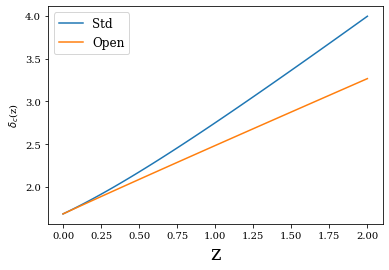

In [6]:
def delta_c(z, om0=om, ol0=oml):
    """critical overdensity"""
    return 1.686*growth(0, om0, ol0)*(1+z)/growth(z, om0, ol0)
zs = np.linspace(0,2, 100)
plt.plot(zs, delta_c(zs, 0.3, 0.7), label='Std')
plt.plot(zs, delta_c(zs, 0.3, 0), label='Open')
plt.xlabel('z', size=20)
plt.ylabel('$\delta_c$(z)')
plt.legend()

#### Power spectrum at different scales as a function of $\Omega_m$

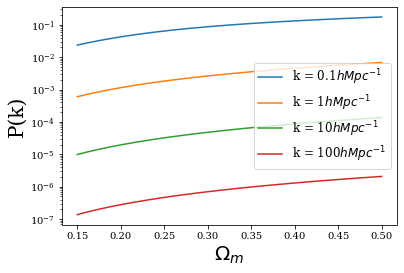

In [7]:
ks = [0.1, 1, 10, 100]
s8 = 0.8
omegas = np.linspace(0.15, 0.5, 1000)
for k in ks:
    res = []
    for om in omegas:
        res.append(Transfer(k, omega=om))
    plt.plot(omegas, res, label='k = '+str(k)+'$hMpc^{-1}$')
    plt.xlabel('$\Omega_m$', size=20)
    plt.ylabel('P(k)', size=20)
    plt.yscale('log')
    plt.legend()

#### Power spectrum at different $\Omega_m$ with a fixed $\sigma_8$ and (solid) and with free $\sigma_8$ (dashed) 

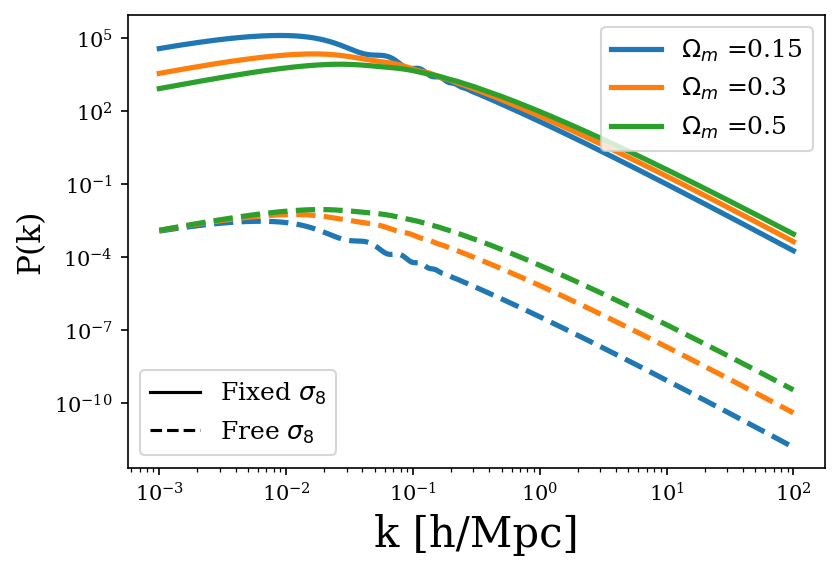

In [22]:
ks = np.logspace(-3, 2, 1000)
omegas = [0.15, 0.3, 0.5]
res = []

for i in range(3):
    el = omegas[i]
    plt.loglog(ks, power_spectrum(ks, om0=el), color = 'C{}'.format(i), linewidth=2.5, label='$\Omega_m$ ='+str(el))        
    plt.loglog(ks, ks**0.96*Transfer(ks, omega=el)**2, '--', color = 'C{}'.format(i), linewidth=2.5)

ax = plt.gca()
first_legend = ax.legend(loc='upper right')

line1 = mlines.Line2D([], [], linestyle='-', color='black', label='Fixed $\sigma_8$')
line2 = mlines.Line2D([], [], linestyle='--', color='black', label='Free $\sigma_8$')

additiona_legend = ax.legend(handles=[line1, line2], loc='lower left')

ax.add_artist(first_legend)
plt.xlabel('k [h/Mpc]', size=20)
plt.ylabel('P(k)', size=15)
plt.savefig('./figs/ps_omegas.png', bbox_inches='tight', dpi=300)

#### rms of the density fluctuations 

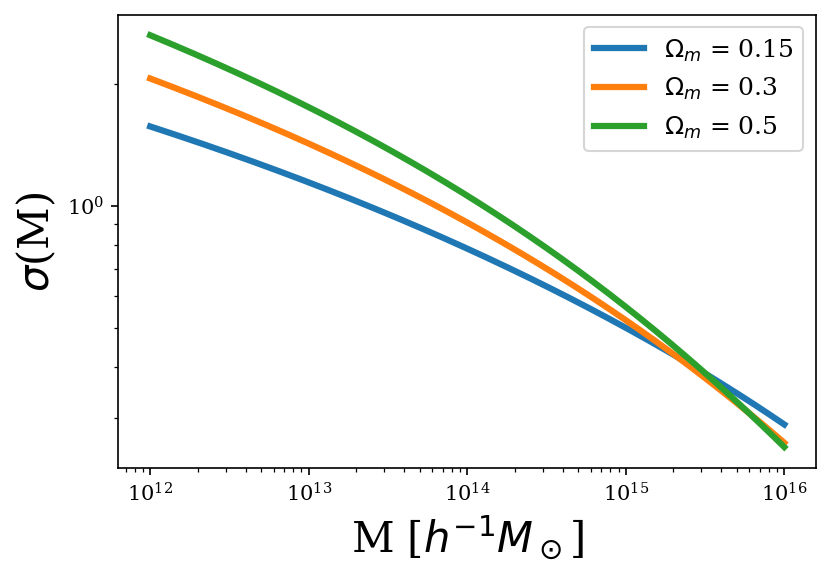

In [23]:
Ms = np.logspace(12, 16, 1000)
omegas = [0.15, 0.3, 0.5]
for i in range(len(omegas)):
    plt.loglog(Ms, sigma(Ms, om0=omegas[i]), color='C{}'.format(i), linewidth=3, label='$\Omega_m$ = '+str(omegas[i]))
plt.legend()
plt.xlabel('M [$h^{-1}M_\odot$]', size=20)
plt.ylabel('$\sigma$(M)', size=20)
plt.savefig('./figs/sigma_omegas.png', bbox_inches='tight', dpi=300)

#### Normalized $\sigma(M)$ as a function of $\Omega_m$

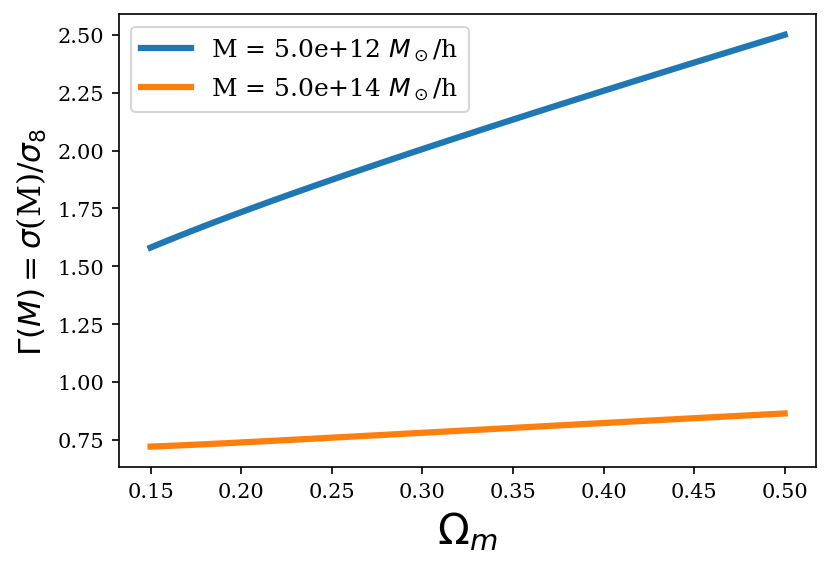

In [24]:
Ms = [5e12, 5e14]
omegas = np.linspace(0.15, 0.5, 100)

for m in Ms:
    res = []
    for i in range(len(omegas)):
        res.append(sigma(m, om0=omegas[i])/0.8)
    plt.plot(omegas, res, linewidth=3, label='M = {:2.1e} $M_\odot/$h'.format(m))
plt.legend()
plt.xlabel('$\Omega_m$', size=20)
plt.ylabel('$\Gamma(M)=\sigma$(M)/$\sigma_8$', size=15)
plt.savefig('./figs/gamma_vs_omegas.pdf', bbox_inches='tight', dpi=300)
plt.savefig('./figs/gamma_vs_omegas.png', bbox_inches='tight', dpi=300)

#### The origin of the peak height dependance 

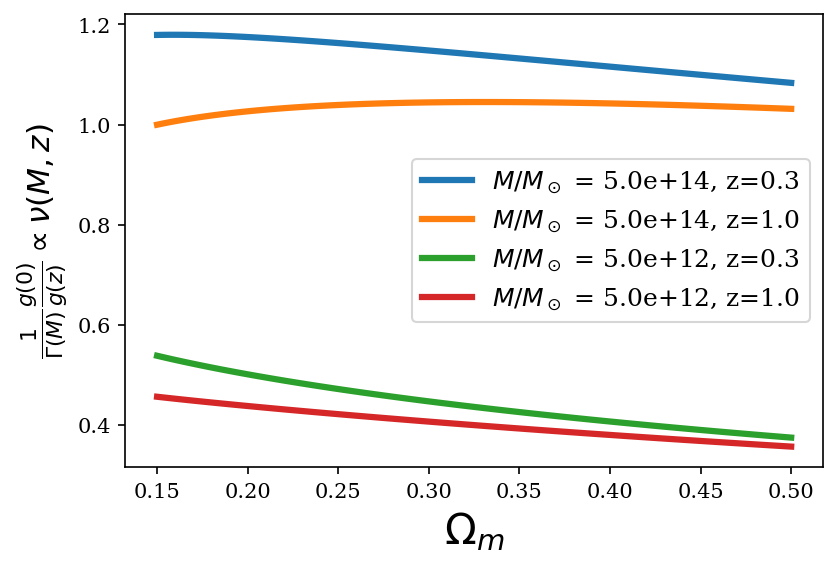

In [25]:
import matplotlib.pyplot as plt
params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
plt.rcParams["figure.dpi"]= 150
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(params)

Ms = [5e14, 5e12]
zs = [0.3, 1]
omegas = np.linspace(0.15, 0.5, 100)
#colors = ['b', 'r', 'g']
for m in Ms:
    for red in zs:
        res = []
        for i in range(len(omegas)):
            res.append(0.8*growth(0, om0=omegas[i], ol0=1-omegas[i])/(growth(red, om0=omegas[i], ol0=1-omegas[i])*sigma(m, om0=omegas[i])))
        plt.plot(omegas, res, linewidth=3, label='$M/M_\odot$ = {:2.1e}, z={:2.1f}'.format(m, red))
plt.legend()
plt.xlabel('$\Omega_m$', size=20)
plt.ylabel(r'$\frac{1}{\Gamma(M)}\frac{g(0)}{g(z)} \propto \nu(M,z)$', size=15)
plt.savefig('norm_nus_vs_omegas.pdf', bbox_inches='tight', dpi=300)
plt.savefig('norm_nus_vs_omegas.png', bbox_inches='tight', dpi=300)

#### A-1-2-3 Differential comoving volume

Text(0, 0.5, 'dV/dz/d$\\Omega$ [h$^{-3}$Mpc$^3$sr$^{-1}$]')

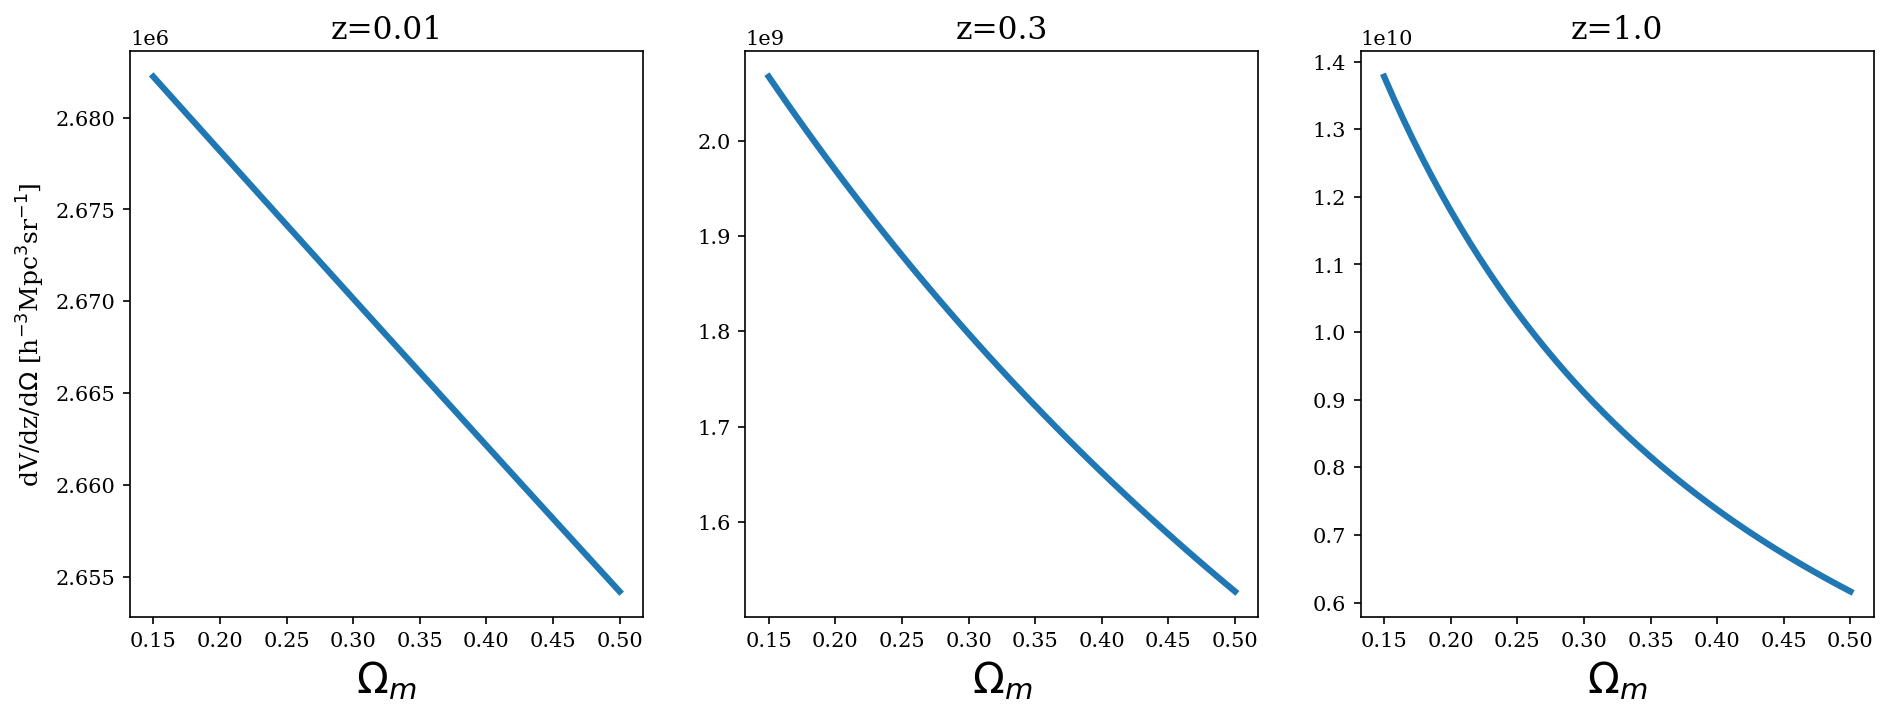

In [35]:
size=50
h=0.7
omegas = np.linspace(0.15, 0.5, size)
prec2 = 100000 
zs = np.array([0.01, 0.3, 1])
res = np.zeros((3,size))
angle = (1000*np.pi/180)**2
fig, axs = plt.subplots(1,3, figsize=[15,5])
for i in range(size):
    cosmo = LambdaCDM(H0=100*h, Om0=omegas[i], Ode0=1-omegas[i], Ob0=omb)
    res[:, i] = cosmo.differential_comoving_volume(zs).value*h**3

for j in range(3):
    axs[j].plot(omegas, np.array(res[j, :]), linewidth=3)

    axs[j].set_title('z={}'.format(zs[j]), size=15)
    
    axs[j].set_xlabel('$\Omega_m$', size=20)  
axs[0].set_ylabel('dV/dz/d$\Omega$ [h$^{-3}$Mpc$^3$sr$^{-1}$]', size=12)

    

#### B-4-5-6 Total mass

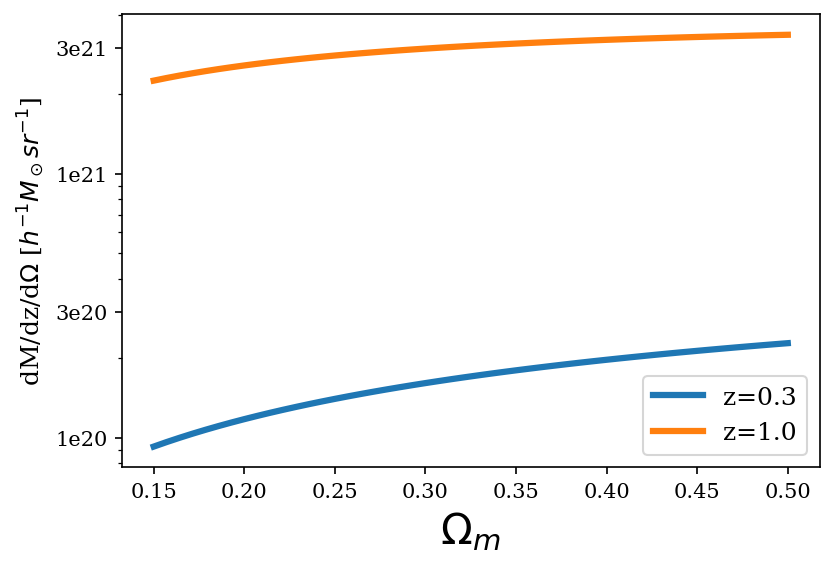

In [39]:
size=50
h=0.7
omegas = np.linspace(0.15, 0.5, size)
prec2 = 100000 
zs = np.array([0.3, 1])
res = np.zeros((2,size))
#dz = (z2 - z) / prec2
angle = (1000*np.pi/180)**2
for i in range(size):
    cosmo = LambdaCDM(H0=100*h, Om0=omegas[i], Ode0=1-omegas[i], Ob0=omb)
    rho_0 = (rho_c*h**2)*omegas[i]
    rho_z = rho_0*(1+zs)**3
    res[:, i] = rho_z*cosmo.differential_comoving_volume(zs).value*h**3
fig, axs = plt.subplots(1, 1)
for j in range(2):    
    axs.plot(omegas, np.array(res[j, :]), linewidth=3, label='z={}'.format(zs[j]))
axs.set_yscale('log')
y_locator = FixedLocator([1e20, 3e20, 1e21, 3e21])
y_formatter = FixedFormatter(["1e20", "3e20", "1e21", "3e21"])
axs.yaxis.set_major_locator(y_locator)
axs.yaxis.set_major_formatter(y_formatter)

plt.xlabel('$\Omega_m$', size=20)
plt.ylabel('dM/dz/d$\Omega$ [$h^{-1}M_\odot sr^{-1}$]', size=12)


plt.legend()

plt.savefig('./figs/mass_omegam.pdf', dpi=300, bbox_inches='tight')
plt.savefig('./figs/mass_omegam.png', dpi=300, bbox_inches='tight')

plt.show()


#### C-7 Growth rate

In [41]:
def gf(z, om0=om, ol0=oml):
    a = 1/(1+z)
    aprime = np.linspace(1e-20, a, 10000)
    da = aprime[1]-aprime[0]
    hprimes = np.sqrt(om0*aprime**(-3)+ol0+(1-om0-ol0)*aprime**(-2))
    integ = np.sum((aprime*hprimes)**(-3))*da
    return (2.5*om0*hprimes[-1]/a)*integ

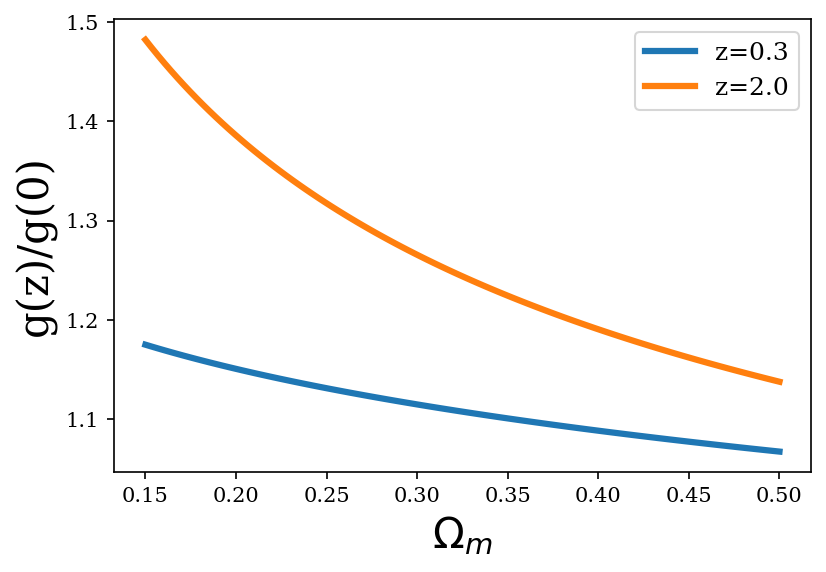

In [42]:
size=100
h=0.7
omegas = np.linspace(0.15, 0.5, size)
res = np.zeros((3,size))
res_c = np.zeros((2,size))
#zs = np.linspace(0, 2, 1000)
#res = []
zs=np.array([0.3,  2])
for i in range(size):
    res_c[:, i] = growth(zs, om0=omegas[i], ol0=1-omegas[i])/growth(0, om0=omegas[i], ol0=1-omegas[i])

for j in range(2):
    plt.plot(omegas, res_c[j,:], linewidth=3, label='z={}'.format(zs[j]))
    #plt.plot(omegas, 0.9*omegas**(-3/14))
    #plt.loglog(omegas, lin(omegas, 0.2, 1.05))
plt.legend()
plt.xlabel('$\Omega_m$', size=20)
plt.ylabel('g(z)/g(0)', size=20)
#plt.title('z= {}'.format(zs[j]))
plt.savefig('./figs/norm_gofz.png'.format(zs[j]), bbox_inches='tight', dpi=300)
plt.savefig('./figs/norm_gofz.pdf'.format(zs[j]), bbox_inches='tight', dpi=300)

plt.show()


#### g(z)

In [50]:
size=100
h=0.7
omegas = np.linspace(0.15, 0.5, size)
res = np.zeros((3,size))
res_c = np.zeros((3,size))
#zs = np.linspace(0, 2, 1000)
#res = []
zs=np.array([0.01, 0.3,  2])
for i in range(size):
    res_c[:, i] = growth(zs, om0=omegas[i], ol0=1-omegas[i])

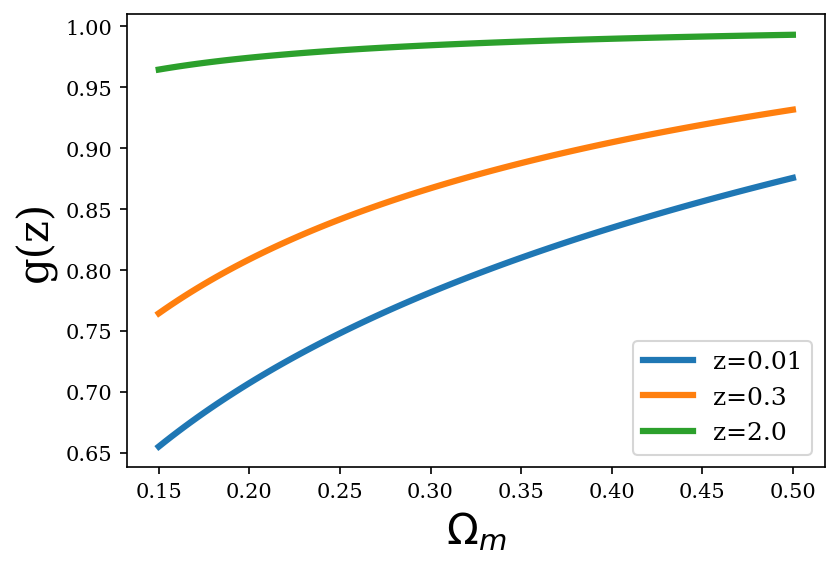

In [52]:

for j in range(3):
    plt.plot(omegas, res_c[j,:], linewidth=3, label='z={}'.format(zs[j]))
plt.legend()
plt.xlabel('$\Omega_m$', size=20)
plt.ylabel('g(z)', size=20)
#plt.title('z= {}'.format(zs[j]))
plt.savefig('./figs/gofz.pdf'.format(zs[j]), bbox_inches='tight', dpi=300)
plt.savefig('./figs/gofz.png'.format(zs[j]), bbox_inches='tight', dpi=300)

plt.show()

#### Collapsed fraction 

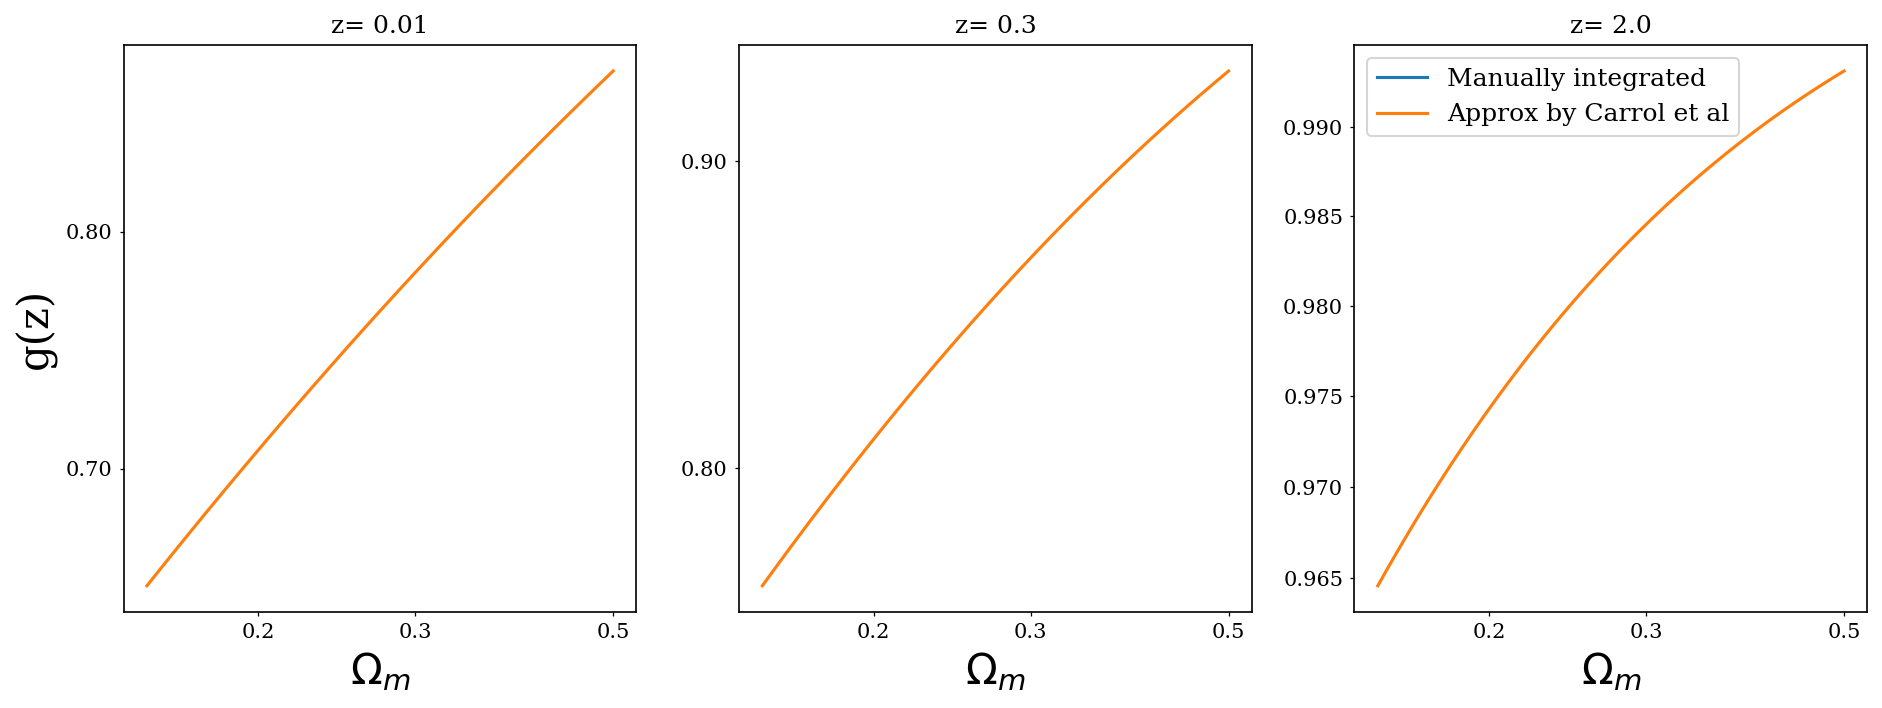

In [62]:
fig, axs = plt.subplots(1,3, figsize=[15,5])
for j in range(3):
    axs[j].loglog(omegas, res[j,:], label='Manually integrated')
    axs[j].loglog(omegas, res_c[j,:], label='Approx by Carrol et al')
    axs[j].set_xlabel('$\Omega_m$', size=20)
    axs[j].set_title('z= {}'.format(zs[j]))
    axs[j].xaxis.set_minor_formatter(ticker.ScalarFormatter())
    axs[j].xaxis.set_minor_locator(ticker.FixedLocator([0.2, 0.3, 0.5]))
    axs[j].yaxis.set_minor_formatter(ticker.ScalarFormatter())

axs[0].set_ylabel('g(z)', size=20)
plt.legend()
plt.show()

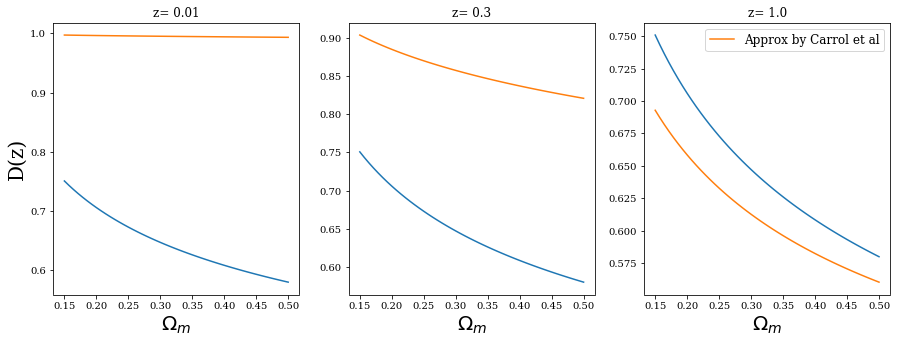

In [5]:
fig, axs = plt.subplots(1,3, figsize=[15,5])
size=50
omegas = np.linspace(0.15, 0.5, size)
zs = np.array([0.01, 0.3, 1])
res_c = np.zeros((3,size))
for i in range(size):
    res_c[:, i] = D(zs, om0=omegas[i], ol0=1-omegas[i])
for j in range(3):
    axs[j].plot(omegas, 0.5*omegas**(-3/14))
    axs[j].plot(omegas, res_c[j,:], label='Approx by Carrol et al'[:22*(j==2)])
    
    axs[j].set_xlabel('$\Omega_m$', size=20)
    axs[j].set_title('z= {}'.format(zs[j]))
axs[0].set_ylabel('D(z)', size=20)

plt.legend()